In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math
import imutils

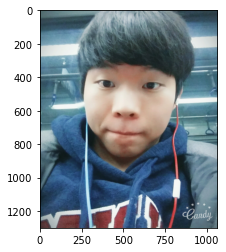

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/img.jpg'
img_bgr = cv2.imread(my_image_path)    # Retrieving as OpenCV image
img_bgr = cv2.resize(img_bgr, (1060, 1300))    # 640x640 Resize

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
plt.imshow(img_rgb)
plt.show()


In [3]:
detector_hog = dlib.get_frontal_face_detector()   #- declare detector 

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(233, 295) (788, 850)]]


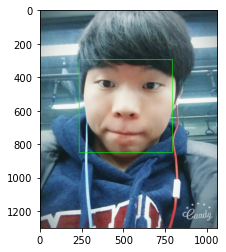

In [5]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# load landmark model
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks)

68
[[(265, 414), (260, 486), (263, 561), (272, 633), (298, 702), (338, 759), (382, 812), (430, 857), (492, 872), (561, 870), (620, 837), (677, 789), (731, 736), (769, 666), (791, 593), (806, 515), (814, 438), (294, 355), (332, 331), (383, 333), (433, 348), (483, 371), (562, 380), (617, 364), (673, 355), (728, 360), (769, 392), (518, 448), (515, 494), (512, 540), (508, 588), (448, 631), (477, 639), (507, 646), (539, 642), (569, 638), (344, 430), (376, 422), (414, 426), (444, 454), (408, 460), (369, 454), (606, 463), (639, 439), (679, 439), (711, 450), (682, 471), (642, 473), (395, 715), (441, 722), (479, 720), (502, 730), (527, 724), (569, 734), (616, 736), (567, 764), (524, 773), (497, 772), (471, 766), (435, 750), (409, 720), (477, 736), (501, 744), (526, 742), (601, 738), (524, 745), (499, 745), (475, 739)]]


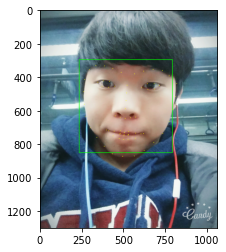

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Putting sticker

In [9]:
print(list(zip(dlib_rects, list_landmarks)))
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = landmark[45][0] - landmark[36][0]
    h = landmark[62][1] - landmark[30][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

[(rectangle(233,295,788,850), [(265, 414), (260, 486), (263, 561), (272, 633), (298, 702), (338, 759), (382, 812), (430, 857), (492, 872), (561, 870), (620, 837), (677, 789), (731, 736), (769, 666), (791, 593), (806, 515), (814, 438), (294, 355), (332, 331), (383, 333), (433, 348), (483, 371), (562, 380), (617, 364), (673, 355), (728, 360), (769, 392), (518, 448), (515, 494), (512, 540), (508, 588), (448, 631), (477, 639), (507, 646), (539, 642), (569, 638), (344, 430), (376, 422), (414, 426), (444, 454), (408, 460), (369, 454), (606, 463), (639, 439), (679, 439), (711, 450), (682, 471), (642, 473), (395, 715), (441, 722), (479, 720), (502, 730), (527, 724), (569, 734), (616, 736), (567, 764), (524, 773), (497, 772), (471, 766), (435, 750), (409, 720), (477, 736), (501, 744), (526, 742), (601, 738), (524, 745), (499, 745), (475, 739)])]
(508, 588)
(x,y) : (508,310)
(w,h) : (367,156)


In [10]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h//2))
print (img_sticker.shape)

(78, 367, 3)


In [11]:
refined_x = landmark[36][0]   # left
refined_y = landmark[30][1]       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,588)


In [12]:
# # 음수 처리
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)
# refined_y = 0
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [13]:
theta = math.atan(h/w)
print(theta)
sticker_rot = imutils.rotate(img_sticker,angle=-1*theta)

0.401928344186296


In [14]:
sticker_area = img_show[refined_y:refined_y+sticker_rot.shape[0], refined_x:refined_x+sticker_rot.shape[1]]
sticker_area.shape
img_show[refined_y:refined_y+sticker_rot.shape[0], refined_x:refined_x+sticker_rot.shape[1]] = \
    np.where(sticker_rot==255,sticker_area,sticker_rot).astype(np.uint8)

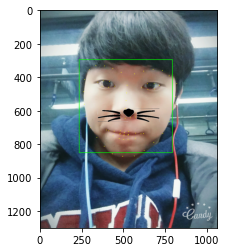

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

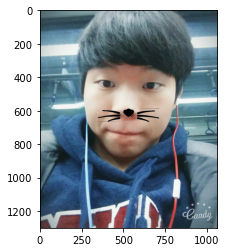

In [16]:
sticker_area = img_bgr[refined_y:refined_y+sticker_rot.shape[0], refined_x:refined_x+sticker_rot.shape[1]]
img_bgr[refined_y:refined_y+sticker_rot.shape[0], refined_x:refined_x+sticker_rot.shape[1]] = \
    np.where(sticker_rot==255,sticker_area,sticker_rot).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()